<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tensorflow-tutorials-:-합성곱-신경망" data-toc-modified-id="Tensorflow-tutorials-:-합성곱-신경망-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tensorflow tutorials : <a href="https://www.tensorflow.org/tutorials/images/cnn?hl=ko" target="_blank">합성곱 신경망</a></a></span></li></ul></div>


# [AI 오픈 이노베이션] 기본 저녁반<a class="tocSkip">
GitHub link: [https://github.com/realblack0/ai_lecture_fundamental](https://github.com/realblack0/ai_lecture_fundamental)  
E-Mail: realblack0@gmail.com

## Tensorflow tutorials : [합성곱 신경망](https://www.tensorflow.org/tutorials/images/cnn?hl=ko)

이번 수업은 tensorflow 공식 tutorial : [합성곱 신경망](https://www.tensorflow.org/tutorials/images/cnn?hl=ko)을 참조하였습니다.

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

mnist는 색상 채널이 없다. 

In [4]:
X_train[0].shape

(28, 28)

색상 채널 추가한다.

In [6]:
temp = X_train.reshape(60000, 28, 28, 1)

In [23]:
temp[0].shape

(28, 28, 1)

X_train은 이미지를 시각화할 수 있지만,  
색상 채널을 추가한 temp는 이미지를 시각화할 수 없다.

In [7]:
import matplotlib.pyplot as plt

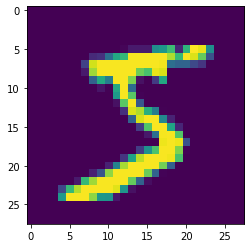

In [8]:
plt.imshow(X_train[0])

In [ ]:
# Error
plt.imshow(temp[0])

temp[0]을 확인해보면 차원만 늘렸을 뿐, 색상 채널의 값이 없기 때문에 `imshow`가 안된다.

In [26]:
temp[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
     

출력 중략...

CNN에 사용하기 위해서 차원을 만들고 MinMaxScaling 전처리한다.

In [11]:
X_train = X_train.reshape(60000, 28, 28, 1) / 255.
X_test = X_test.reshape(10000, 28, 28, 1) / 255.

CNN 모델 뼈대를 만들기 위한 클래스를 임포트한다.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Convolution2D, MaxPooling2D, MaxPool2D, Dense, Flatten 

keras는 사용 편의를 위해서 이름이 긴 레이어의 단축표현을 만들어뒀다.

In [13]:
# Conv2D는 줄임표현
Convolution2D is Conv2D

True

In [15]:
# MaxPool2D는 줄임표현
MaxPooling2D is MaxPool2D

True

CNN 모델은 보통 classification용 `Dense` 레이어를 뒤에 붙인다.  
`Convolution2D` 레이어는 배치 제외 3차원으로 output을 만든다.  
`Dense` 레이어는 1차원만 input으로 받을 수 있기 때문에 중간에 `Flatten` 레이어를 넣는다.

In [18]:
model = Sequential([
    Convolution2D(32, (3, 3), input_shape=(28, 28, 1), activation="relu"), # input_shape은 입력 데이터 1개의 sahpe
    Convolution2D(64, (3, 3), activation="relu"), 
    Flatten(), # shape 변환
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])

model을 만든 다음에는 `summary`로 꼭 확인해본다.

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2359360   
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 2,382,986
Trainable params: 2,382,986
Non-trainable params: 0
______________________________________________

모델의 구조를 확인하는 또다른 방법으로 `plot_model`이 있다.  
그러나. 

In [20]:
from tensorflow.keras.utils import plot_model

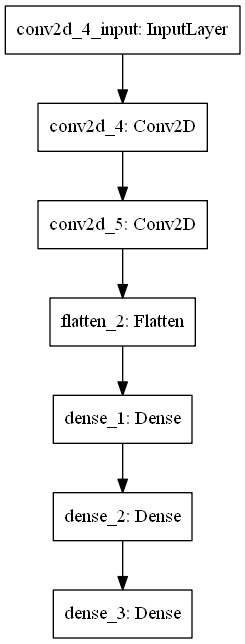

In [30]:
# 경우에 따라서 Error
plot_model(model)

GraphViz에 대한 설정이 되어있지 않은 경우 에러가 발생한다.
```
InvocationException: GraphViz's executables not found
```

모델 시각화를 위해서는 `plot_model`보다 `TensorBoard`를 사용하는 것을 권장한다.